## Predictive modelling 
### Week 3-1: Feature Engineering Part 1

#### Content 
1. Outliers
2. Missing values
3. Target variable transformation

In [1]:
# libraries
import pandas as pd # process dataframe
import numpy as np # scientific calculation
import seaborn as sns # visualization complete stastistics
import matplotlib.pyplot as plt # visualization

### 0. Create a fake dataset 

In [2]:
df = pd.DataFrame({
    'Target': [10.5, 9.5, 8.7, 9.5, 10, 45, 9, 9.1, 8.2, 11],
    'Feature_1': [3, 1.3, 0.7, 1.5, 2, 4, 0.9, 0.88, 1.11, 3],
    'Feature_2': [3, 2.5, 5.7, 1, np.nan, 4.4, 3.3, np.nan, 2, 1],
    'Feature_3': [np.nan, np.nan, np.nan, np.nan, np.nan, 3, 7, 2, 3, 5]
})

display(df)

,Target,Feature_1,Feature_2,Feature_3
0,10.5,3.00,3.0,NaN
1,9.5,1.30,2.5,NaN
2,8.7,0.70,5.7,NaN
3,9.5,1.50,1.0,NaN
4,10.0,2.00,NaN,NaN
5,45.0,4.00,4.4,3.0
6,9.0,0.90,3.3,7.0
7,9.1,0.88,NaN,2.0
8,8.2,1.11,2.0,3.0
9,11.0,3.00,1.0,5.0


Let's inspect this dataset

In [3]:
df.describe()

,Target,Feature_1,Feature_2,Feature_3
count,10.000000,10.000000,8.000000,5.0
mean,13.050000,1.839000,2.862500,4.0
std,11.256924,1.126809,1.622993,2.0
min,8.200000,0.700000,1.000000,2.0
25%,9.025000,0.952500,1.750000,3.0
50%,9.500000,1.400000,2.750000,3.0
75%,10.375000,2.750000,3.575000,5.0
max,45.000000,4.000000,5.700000,7.0


### 1. An Outlier
The data point that differs significantly from other observations. Statiscally, the outlier can be identify using the Tukey's box plot method.

Let do this for the target. <br>

#### 1.1 Tukey's boxplot method. 
Using this method, there is one outlier (45). We may also create a function to extract this value. The code is derived from Alicia Horsh's Blog [https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755].

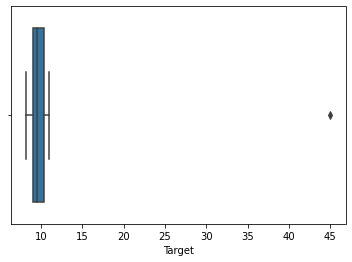

In [23]:
sns.boxplot(x=df['Target']);

In [5]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    outliers_poss = []
    
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_poss, inner_fence_le, inner_fence_ue 

In [6]:
# get information about Tukey's outliers. 

outlier_indices, lower_limit, upper_limit = tukeys_method(df,'Target')

print('The outlier index in the dataframe: ', outlier_indices)
print('Lower limit: ', lower_limit)
print('Upper limit: ', upper_limit)

The outlier index in the dataframe:  [5]
Lower limit:  7.000000000000001
Upper limit:  12.399999999999999


In [7]:
# extract the value of the outlier
df['Target'].iloc[5]

45.0

How the outlier looks like on other representations?

count    10.000000
mean     13.050000
std      11.256924
min       8.200000
25%       9.025000
50%       9.500000
75%      10.375000
max      45.000000
Name: Target, dtype: float64

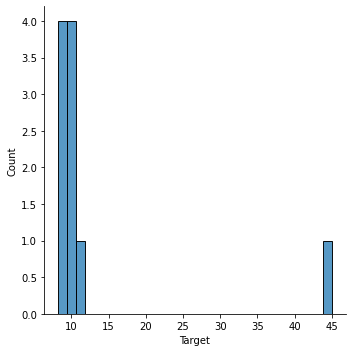

In [8]:
display(df['Target'].describe())
sns.displot(df['Target']);

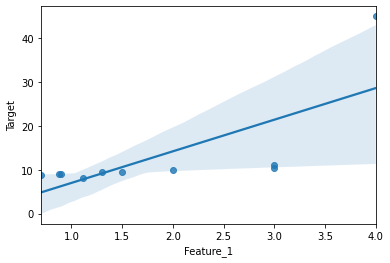

In [9]:
sns.regplot(y=df['Target'], x=df['Feature_1']);

#### 1.2 Eliminating outliers
Practically, we need to take outliers out from the analysis because it would improve the accuracy of the model. For example, the regression would be fitted towards most of data points.

count     9.000000
mean      9.500000
std       0.883176
min       8.200000
25%       9.000000
50%       9.500000
75%      10.000000
max      11.000000
Name: Target, dtype: float64

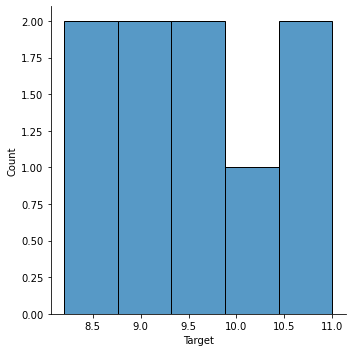

In [10]:
df_filt = df[df['Target']<upper_limit]

display(df_filt['Target'].describe())
sns.displot(df_filt['Target']);

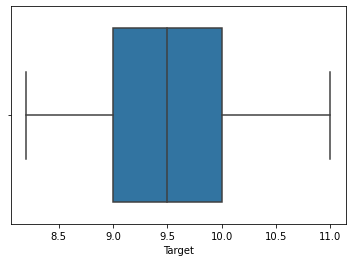

In [11]:
sns.boxplot(x=df_filt['Target']);

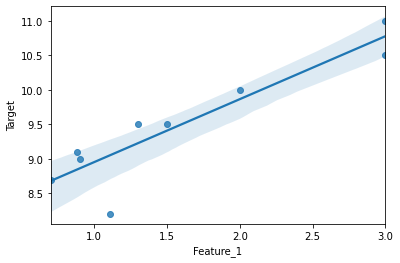

In [12]:
sns.regplot(y=df_filt['Target'], x=df_filt['Feature_1']);

### 2. Missing values
In terms of business, missing values are commonly caused by data collection limitations. For example, sometimes we didn't collect users attributes because they don't give the consent. This could be seen as missing at random (MAR). The treatment to this type of missing is to delete the missing rows or to impute them using central tendency values. <br> <br>
Another situation is called missing not at random (MNAR), this is the case when we couldn't collect information from a particular group of users. The treatment are either exclude this feature from the analysis or impute the data if we have sufficient knowledge about the feature. Below plot is to inspect the missing data patterns. 

#### 2.1. Inspecting missing value patterns
We will use misingno module to visualize the missing data pattern.

In [24]:
# install missingno module
!pip install missingno

You should consider upgrading via the 'c:\users\natanop.pimonsathian\anaconda3\python.exe -m pip install --upgrade pip' command.


In [25]:
import missingno as msno

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Target     10 non-null     float64
 1   Feature_1  10 non-null     float64
 2   Feature_2  10 non-null     float64
 3   Feature_3  7 non-null      float64
dtypes: float64(4)
memory usage: 448.0 bytes


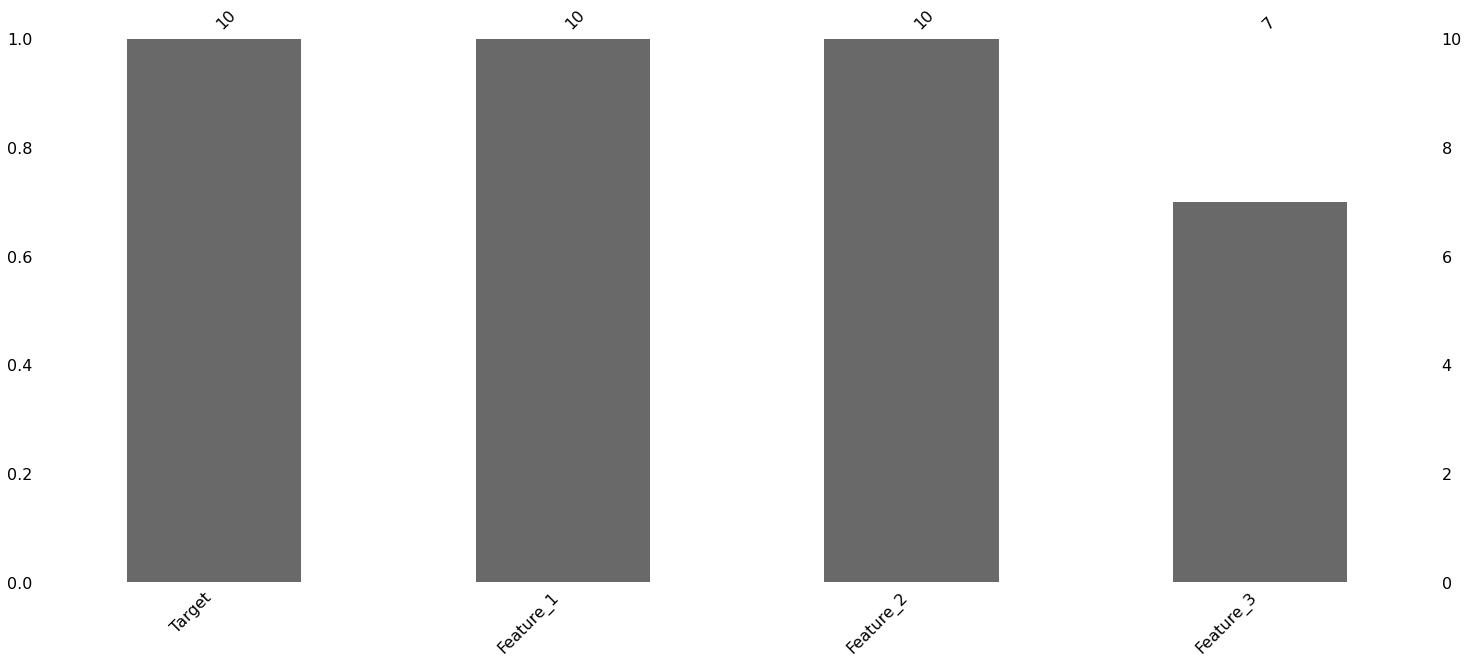

In [26]:
# count the completed rows
msno.bar(df);

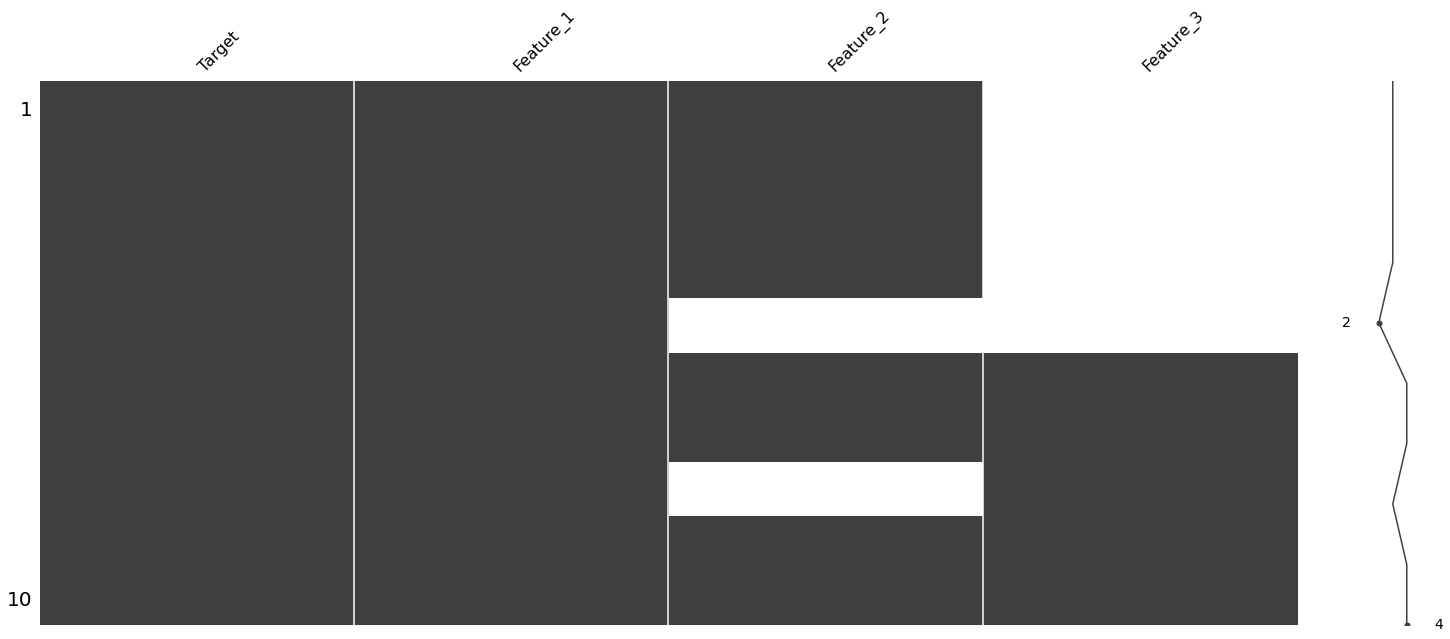

In [15]:
# find the pattern
msno.matrix(df);

#### 2.2. Treatments to missing values

Feature_2, Missing at random, we will impute using the mean. 

count    8.000000
mean     2.862500
std      1.622993
min      1.000000
25%      1.750000
50%      2.750000
75%      3.575000
max      5.700000
Name: Feature_2, dtype: float64

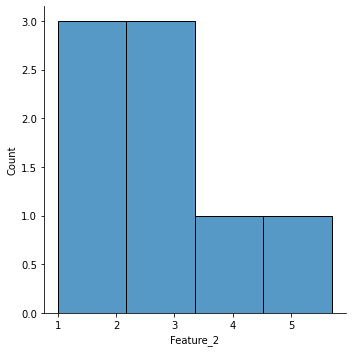

In [16]:
display(df['Feature_2'].describe())
sns.displot(df['Feature_2']);

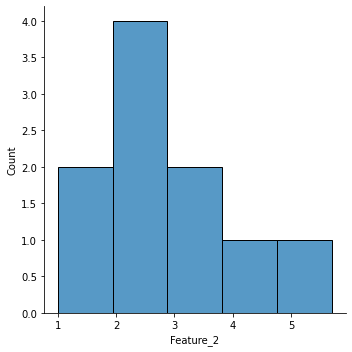

In [17]:
df['Feature_2'] = df['Feature_2'].fillna(np.mean(df['Feature_2']))
sns.displot(df['Feature_2']);

Feature_3, Missing not at random, probable we will impute using the most common value (mode) 

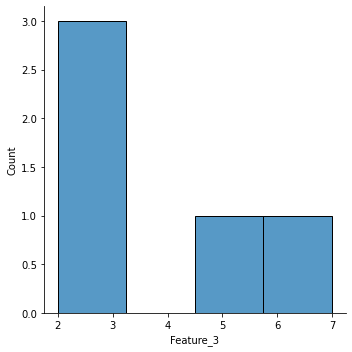

In [18]:
sns.displot(df['Feature_3']);

0    3.0
dtype: float64


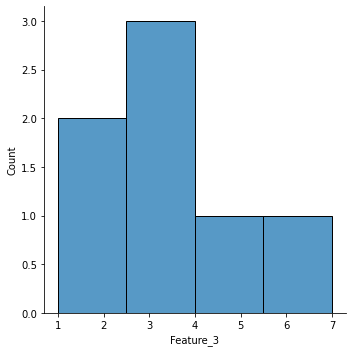

In [19]:
print(df['Feature_3'].mode()) # extract the mode 

# impute using the mode
df['Feature_3'] = df['Feature_3'].fillna(df['Feature_2'].mode())
sns.displot(df['Feature_3']);

### 3. Target variable transformation
When we have small and big value together like small and large amounts of transaction to be predicted. The data can be very skewed. Most of the models can't perform well when learning from the skewed target variable. One of the ways to reduce the skewness is to scale the data using log transformation. 

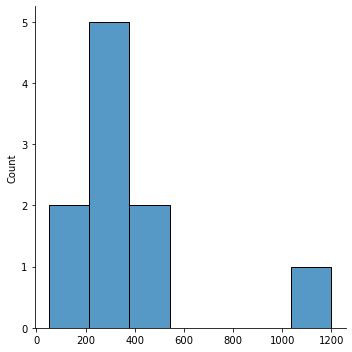

In [20]:
transaction_amount = np.array([50, 340, 200, 250, 220, 229, 239, 1200, 422, 500])
sns.displot(transaction_amount);

In [31]:
np.log10(1)

0.0

In [33]:
np.log10(10)

1.0

In [32]:
np.log10(100)

2.0

In [30]:
np.log10(1000)

3.0

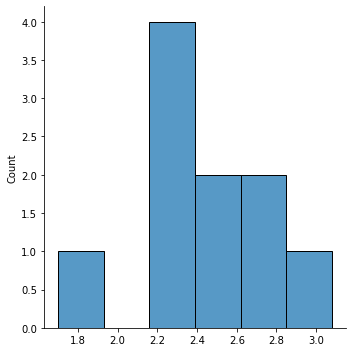

In [34]:
sns.displot(np.log10(transaction_amount));